# Brownian chiral particle. Tracking.

Developed by fvega@eaphysics.xyz; Lausanne jun-aug 2023

## <span style="color:red">*Import libraries* </span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.patches as patches
import matplotlib.font_manager

import pandas as pd
import scipy.signal as signal
import ipywidgets as widgets

import pims
import cv2 as cv
import skimage as scikit
import trackpy as tp

%matplotlib --list
%matplotlib widget

plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams.update({'font.size':14})

print('\npandas version no.:', pd.__version__)

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']

pandas version no.: 1.4.3


## HTML video (mime type) viewer

In [2]:
%%HTML
<video width="416" height="400" controls>
  <source src="suppementary_video.mp4" type="video/mp4">
</video>

https://soft-matter.github.io/pims/v0.6.1/search.html?q## PIMS version

## <span style="color:red"> *READ video with PIMS (recommended)* </span>


pixel type is:  uint16

movie length is :  38419

image resolution is:  (832, 800)  (X ,Y )


first frame image:



Frame([[158, 150, 162, ..., 173, 169, 145],
       [154, 157, 148, ..., 198, 163, 130],
       [153, 152, 144, ..., 223, 183, 162],
       ...,
       [200, 195, 187, ..., 174, 132, 138],
       [189, 189, 187, ..., 133, 115, 111],
       [189, 170, 181, ..., 102,  99, 106]], dtype=uint16)
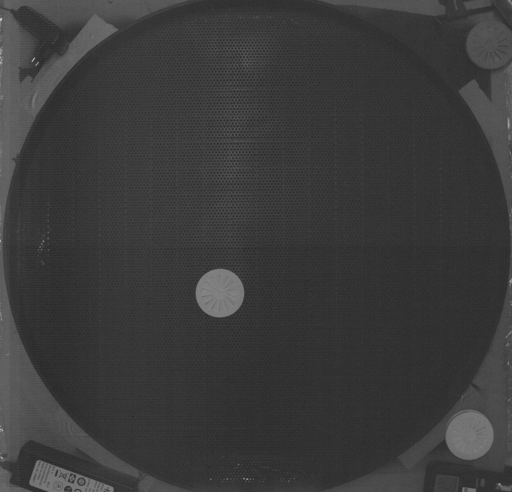

In [3]:
video = pims.Cine('/home/fvega/Datos/brownian_blades/180322/blanca_265.cine')
print('\npixel type is: ', video.pixel_type)
print('\nmovie length is : ', video.len())
print('\nimage resolution is: ', video.frame_shape, ' (X ,Y )\n')
print('\nfirst frame image:\n')
video[0]


pixel type is:  uint16

movie length is :  24981

image resolution is:  (1280, 800)  (X ,Y )


first frame image:



Frame([[222, 225, 221, ..., 192, 194, 198],
       [227, 226, 226, ..., 197, 191, 197],
       [224, 233, 216, ..., 192, 200, 195],
       ...,
       [378, 383, 381, ..., 116, 118, 113],
       [381, 378, 384, ..., 116, 113, 109],
       [382, 381, 386, ..., 118, 122, 122]], dtype=uint16)
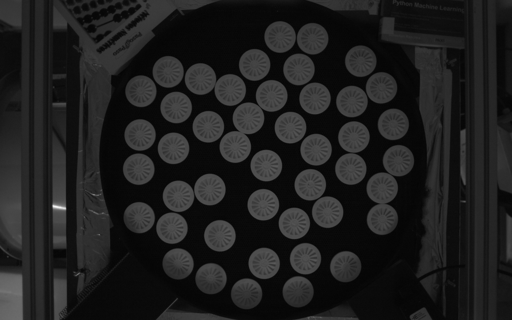

In [61]:
video = pims.Cine('/home/fvega/Datos/blades/movies/serieAspas_N45_p23_fps250_1.cine')
print('\npixel type is: ', video.pixel_type)
print('\nmovie length is : ', video.len())
print('\nimage resolution is: ', video.frame_shape, ' (X ,Y )\n')
print('\nfirst frame image:\n')
video[0]

In [4]:
np.max(video[0])

464

In [62]:
video.frame_shape
# X is 832 (no. of columns)
# Y is 800 (no. of rows)

(1280, 800)

In [63]:
# NOTICE, HOWEVER:
np.shape(video[0])

(800, 1280)

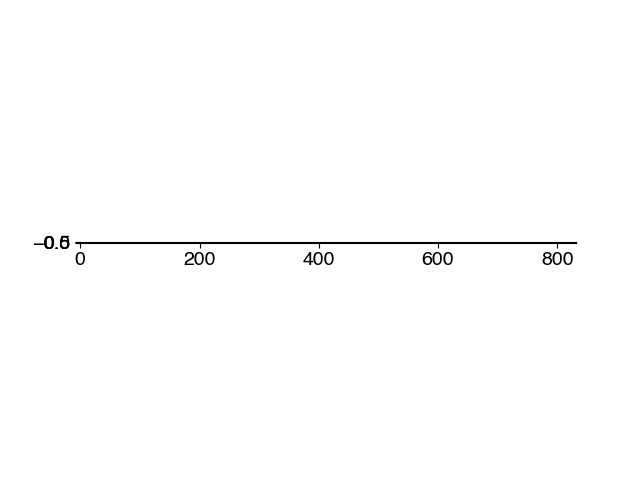

In [4]:
## MATRIX FORMAT: 
## first index is row (Y coord), second index is column (X coord)

# display first row complete (Y value, 1st index)
plt.figure()
plt.imshow(video[0][0:1,:], cmap=cm.binary_r)

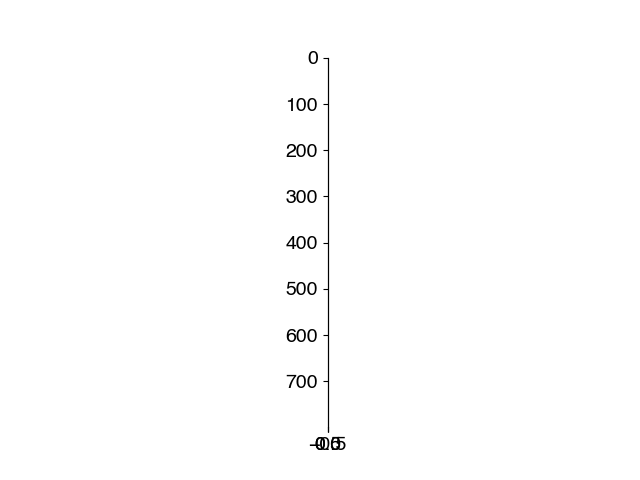

In [5]:
# display first column complete (X value, 2nd index)
plt.figure()
plt.imshow(video[0][:,0:1], cmap=cm.binary_r)
#plt.close()

255


Frame([[158, 150, 162, ..., 173, 169, 145],
       [154, 157, 148, ..., 198, 163, 130],
       [153, 152, 144, ..., 223, 183, 162],
       ...,
       [200, 195, 187, ..., 174, 132, 138],
       [189, 189, 187, ..., 133, 115, 111],
       [189, 170, 181, ..., 102,  99, 106]], dtype=uint8)
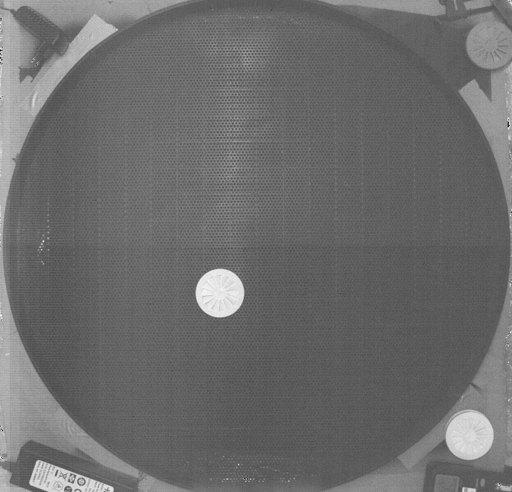

In [6]:
# standart conversion to 8-bit range ([0, 255])
print(np.max(video[0].astype('uint8')))
video[0].astype('uint8')


255


Frame([[158, 150, 162, ..., 173, 169, 145],
       [154, 157, 148, ..., 198, 163, 130],
       [153, 152, 144, ..., 223, 183, 162],
       ...,
       [200, 195, 187, ..., 174, 132, 138],
       [189, 189, 187, ..., 133, 115, 111],
       [189, 170, 181, ..., 102,  99, 106]], dtype=uint8)
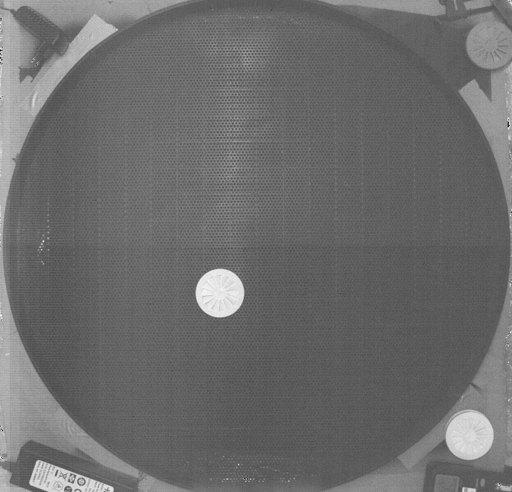

In [7]:
# numpy conversion to 8-bit range ([0, 255])
print(np.max(video[0].astype(np.uint8)))
video[0].astype(np.uint8)


In [11]:
# OpenCV conversion to 8-bit range ([0, 255])
print(np.max(cv.convertScaleAbs(video[0])))
cv.convertScaleAbs(video[0])


255


array([[158, 150, 162, ..., 173, 169, 145],
       [154, 157, 148, ..., 198, 163, 130],
       [153, 152, 144, ..., 223, 183, 162],
       ...,
       [200, 195, 187, ..., 174, 132, 138],
       [189, 189, 187, ..., 133, 115, 111],
       [189, 170, 181, ..., 102,  99, 106]], dtype=uint8)

## <span style="color:red"> *Display Image functions* </span>

### <span style="color:red"> 1- Display frame, OpenCV method (opens separate window) </span>

In [64]:
def cvdisplay(image, tag):
    canvas_name = "frame no. " + str(tag) + ";\tpres 'q' to exit"
    cv.imshow(canvas_name, cv.convertScaleAbs(image))
    cv.waitKey(0)
    cv.destroyAllWindows()


In [65]:
cvdisplay(video[0], 0)

### <span style="color:red"> 2- Display frame, plt.imshow METHOD </span>

In [11]:
def pltdisplay(S, frame, tag):
    canvas_name = 'frame no. ' + str(tag)
    plt.figure(tag,figsize=(S,S))
    plt.title(canvas_name)
    # alternatively convert to 8-bit use opencv function
    plt.imshow(frame, cmap=cm.binary_r)

In [66]:
# bitwise_xor: highlights image differences
imm = cv.bitwise_xor(cv.convertScaleAbs(video[0]), cv.convertScaleAbs(video[2000]))

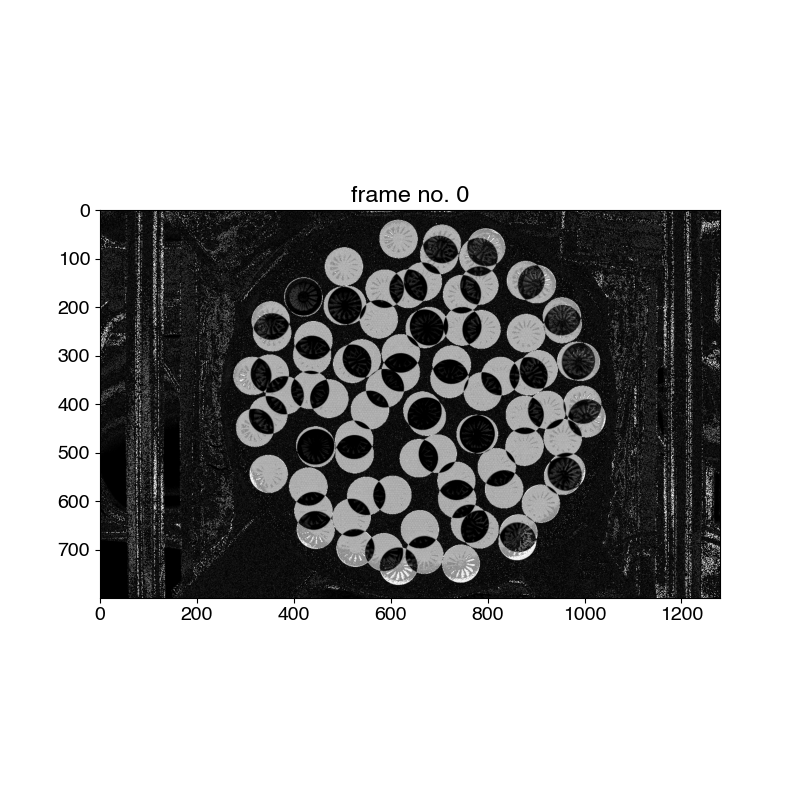

In [67]:
pltdisplay(8, imm, 0)


## Examples of pims frames properties

In [68]:
len(video.frame_time_stamps)

24981

In [69]:
video.image_count

24981

In [70]:
video.pixel_type

dtype('uint16')

In [71]:
video.frame_rate_avg

250.00000065586894

In [72]:
video.frame_rate

250

In [18]:
video.frame_time_stamps[:5]

[(datetime.datetime(2022, 3, 18, 11, 57, 54), 0.4923399647232145),
 (datetime.datetime(2022, 3, 18, 11, 57, 54), 0.49367328616790473),
 (datetime.datetime(2022, 3, 18, 11, 57, 54), 0.49500660761259496),
 (datetime.datetime(2022, 3, 18, 11, 57, 54), 0.4963399290572852),
 (datetime.datetime(2022, 3, 18, 11, 57, 54), 0.4976732505019754)]

## <span style="color:red">*Extract exact time stamps of all frames* </span>

* input: video frame (video_obj)
* output: 1D np array (t)

In [73]:
# This function obtains the exact time arrays

def to_time(video_obj):
    
    times = np.array(video_obj.frame_time_stamps).T
    t = np.zeros(video_obj.image_count) 
    s = times[0][0].second
    ns = 0
    for i in range(video_obj.image_count):
        if times[0][i].second != s:
            ns = ns + 1
            s = times[0][i].second
        t[i] = times[1][i] + ns

    t = t - times[1][0]
    
    return t

In [74]:
t = to_time(video)
t[:5]

array([0.   , 0.004, 0.008, 0.012, 0.016])

In [75]:
# average relative difference between actual average fr rate and nominal fps
100*(1-np.abs((np.mean(np.diff(t)) - video.frame_rate)/video.frame_rate))

0.0016000000000238046

## <span style="color:red">*Circular mask (arbitrary center)* </span>

* input: X image size, Y image size, x circle center pos, y circ center pos, circ radius, image to mask
* output: masked image (centered in image circle)

In [85]:
np.shape(video[0])

(800, 1280)

In [79]:
video.frame_shape

(1280, 800)

In [83]:
def black_frame(LX, LY, datatype):
    return np.zeros((LY,LX), dtype=datatype)

black = black_frame(video.frame_shape[0], video.frame_shape[1], np.uint8)
black16 = black_frame(video.frame_shape[0], video.frame_shape[1], np.uint16)

In [84]:
cvdisplay(black,1)

In [86]:
def circle_mask(x0, y0, R, image, base_frame):
    return cv.bitwise_and(image, image, \
    mask = cv.circle(np.copy(base_frame), (round(x0),round(y0)), round(R), 255, -1) ) 
    # np.copy is necessary; otherwise cv.circle modifies base_frame

In [92]:
LX = int(video.frame_shape[0])
LY = int(video.frame_shape[1])
ex0 = 10 # system center eccentricity (X)
ey0 = 0 # idem, for Y

# center the circle
x0 = int(LX/2) + ex0
y0 = int(LY/2) + ey0
# 
R = int(np.min(np.shape(video[0]))/2)

masked_frame = circle_mask( x0, y0, R, video[0], black)
cvdisplay( masked_frame , 0)

### <span style="color:gray">*Draw circle (arbitrary center)* </span>

In [134]:
def circle_line(x0,y0, R, rc, gc, bc, w, image):
    return cv.circle( np.copy(cv.cvtColor(image, cv.COLOR_GRAY2RGB)), (round(x0),round(y0)), round(R), (rc,gc,bc), w)

In [135]:
cvdisplay( circle_line(x0,y0,R, 0,0,255, 2, masked_frame), 3)


In [165]:
image_to_save = circle_line(x0,y0,R, 0,0,255, 2, cv.convertScaleAbs(composed_frame))
cvdisplay(image_to_save, 4)

In [148]:
cv.imwrite('base_prueba_publi_CommsPhys.png', image_to_save)

True

In [147]:
image_to_save.dtype

dtype('uint8')

In [150]:
tracks_c = cv.imread('/home/fvega/Datos/blades/movies/fig4s.png')


In [153]:
np.shape(image_to_save)

(800, 1280, 3)

In [159]:
np.shape(fig4s)

(798, 2408, 3)

In [174]:
cvdisplay(fig4s[:,1600:2250,0],5)

In [176]:
red = fig4s[:,:,0]

In [185]:
green = fig4s[:,:,1]

In [187]:
blue = fig4s[:,:,2]

In [186]:
green[green>210]=0

In [188]:
blue[blue>210]=0

In [179]:
red[red>210]=0

In [204]:
fig4smod = np.array([red.T,green.T,blue.T]).T

In [205]:
np.shape(fig4smod)

(798, 2408, 3)

In [206]:
np.shape(fig4s)

(798, 2408, 3)

In [207]:
cvdisplay(fig4smod,6)

## <span style="color:red"><u> Circle detection</u></span>

	cv.HoughCircles(image, method, dp, minDist, param1, param2, minRadius, maxRadius)
    
( see: https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d)


__im__: input image

__dp__: if dp=1 , the accumulator has the same resolution as the input image. If dp=2 , the accumulator has half as big width and height.

__param1__: edge threshold that will be used by the Canny edge detector (applied to a grayscale image). cvCanny(), internally invoked by cvHoughCircles(), accepts two thresholds. The higher (first) threshold is set to param1 (passed as argument into cvHoughCircles()) and the lower (second) threshold is set to half of this value.

__param2__: Is the value for accumulator threshold. This value is used in the accumulator plane that must be reached so that a line is retrieved.

## <span style="color:red"> *DISK LOCATION function, using*  cv.HoughCircles </span>

In [96]:
def locate_disk(image, dp, m_dist, mr, Mr):
    return cv.HoughCircles(image, cv.HOUGH_GRADIENT, dp, minDist=m_dist, minRadius=mr, maxRadius=Mr)[0]


In [97]:
masked_frame =  circle_mask( x0, y0, R, masked_frame, black)
for i in range(6):
    print(2-i*0.1, locate_disk(cv.convertScaleAbs(masked_frame), 2-i*0.1, 50, 37, 43))
    

2.0 [[953.  219.   39. ]
 [679.  239.   39.4]
 [549.  589.   39.4]
 [445.  659.   39. ]
 [501.  197.   39.6]
 [665.  413.   39.6]
 [775.  461.   39.4]
 [745.  729.   39. ]
 [747.  173.   39.6]
 [621.  295.   39.6]
 [575.  225.   39.6]
 [879.  253.   39.6]
 [781.   97.   39.4]
 [433.  371.   39.6]
 [725.  319.   39.6]
 [587.  367.   39.6]
 [787.  245.   39.6]
 [521.  317.   39.6]
 [763.  647.   39.4]
 [349.  337.   39. ]
 [525.  473.   39.6]
 [789.  373.   39.6]
 [421.  179.   39.6]
 [347.  423.   39.6]
 [955.  547.   39.4]
 [735.  559.   39.6]
 [819.  529.   39.6]
 [885.  343.   39.6]
 [955.  469.   39.6]
 [429.  569.   39.6]
 [351.  227.   39.2]
 [441.  269.   39.6]
 [877.  421.   39.6]
 [445.  491.   39.6]
 [635.  161.   39.6]
 [615.  735.   38. ]
 [347.  543.   39.6]
 [699.   93.   39.6]
 [659.  511.   39.6]
 [983.  309.   38.4]
 [527.  695.   39.6]
 [997.  401.   39.6]
 [901.  151.   39.4]
 [659.  657.   39.6]
 [863.  667.   39.6]]
1.9 [[527.25    696.35     38.9    ]
 [789.45    3

In [102]:
disks = locate_disk( cv.convertScaleAbs(masked_frame), 1.5, 50, 37, 43)

In [105]:
np.sort(disks.T[0])

array([347.25, 347.25, 348.75, 351.75, 420.75, 429.75, 432.75, 440.25,
       444.75, 444.75, 500.25, 521.25, 524.25, 527.25, 549.75, 575.25,
       587.25, 614.25, 621.75, 635.25, 657.75, 660.75, 665.25, 678.75,
       699.75, 725.25, 735.75, 744.75, 746.25, 762.75, 774.75, 780.75,
       786.75, 789.75, 818.25, 863.25, 876.75, 879.75, 884.25, 900.75,
       953.25, 954.75, 956.25, 983.25, 996.75], dtype=float32)

In [112]:
np.where( (disks.T[0]>657) & (disks.T[0]<658))

(array([39]),)

In [113]:
disks[39]

array([657.75, 512.25,  38.65], dtype=float32)

In [106]:
np.sort(disks.T[1])


array([ 92.25,  96.75, 152.25, 161.25, 173.25, 179.25, 197.25, 218.25,
       224.25, 228.75, 239.25, 245.25, 254.25, 267.75, 296.25, 309.75,
       317.25, 318.75, 336.75, 341.25, 366.75, 369.75, 374.25, 401.25,
       414.75, 422.25, 422.25, 461.25, 470.25, 473.25, 489.75, 512.25,
       530.25, 543.75, 548.25, 557.25, 569.25, 588.75, 647.25, 657.75,
       657.75, 665.25, 695.25, 728.25, 734.25], dtype=float32)

## <span style="color:red"> *Full processing function* </span>
(masks disk based on previous disk location)

(  657.786890644454   511.41956441481176 ) 



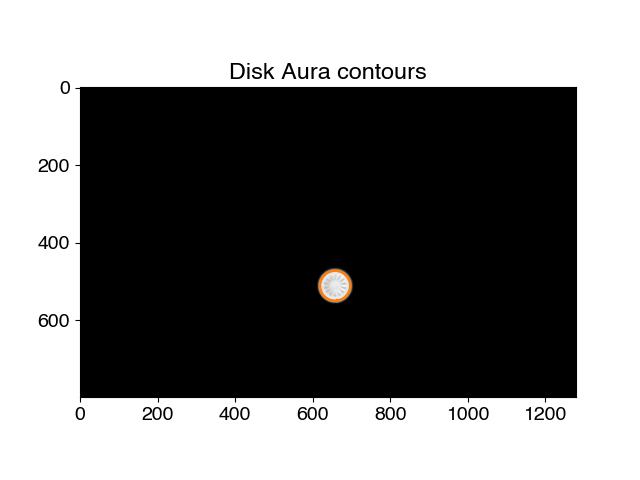

In [114]:
# initial disk detection, by detecting circle (OpenCV, see cell above and below for iteration)
disk = locate_disk( cv.convertScaleAbs(masked_frame), 1.5, 50, 37, 43)[39]
# circular mask (OpenCV), 20% bigger than detected disk
masked_disk = circle_mask(disk[0], disk[1], disk[2]*1.2, masked_frame, black)
# blur masked disk
blur_frame = cv.GaussianBlur(cv.medianBlur(masked_disk, 5), (5,5),0)

# detect aura contours (SciKit) inside the circular mask. detection by px brightness (level parameter)
# inner aura contour, marking inner limit to disk optical boundary (aura) 
contour_out = scikit.measure.find_contours(blur_frame, fully_connected='high', level=125 )
if np.shape(contour_out)[0] >1:
    print('outer contour detection failed\n')
# outer contour, marks outer limit of disk optical boundary (aura); i.e., fading to background
contour_in = scikit.measure.find_contours(blur_frame, fully_connected='high', level=200 )
if np.shape(contour_in)[0] >1:
    print('inner contour detection failed\n')

# plot (matplotlib) detected aura contours
fig, ax = plt.subplots()
plt.title('Disk Aura contours')
ax.imshow(blur_frame, cmap=plt.cm.gray)
for contour in contour_out:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
for contour in contour_in:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

####################
# OUTER CONTOUR mask, disk mask is adjusted to aura outer limit
####################
disk_mask = np.zeros(masked_disk.shape)

# mask is rebuilt by means of SciKit draw.plygon procedure over 
xx, yy = scikit.draw.polygon(contour_out[0][:, 0], contour_out[0][:, 1], disk_mask.shape)
disk_mask[xx, yy] = 255
disk_mask = disk_mask.astype(np.uint8)
#cvdisplay(disk_mask, 9)

# create "masked disk" image from outer contour: everything is wiped out except disk + aura
masked_disk = cv.bitwise_and(masked_disk, masked_disk, mask = disk_mask)
#cvdisplay(masked_disk,0)

####################
# INNER CONTOUR mask, for aura masking (preserves brightness structure of border, for better mass center calc
####################
disk_mask = np.zeros(masked_disk.shape)

xx, yy = scikit.draw.polygon(contour_in[0][:, 0], contour_in[0][:, 1], disk_mask.shape)
disk_mask[xx, yy] = 255
disk_mask = disk_mask.astype(np.uint8)
# disk inside disk border  (aura masked out)
masked_disk_2 = cv.bitwise_and(masked_disk,masked_disk,mask=disk_mask)

# pixel average of disk inside disk border: m00/sum of non-black px
px_avg_disk_2 = cv.moments(masked_disk_2)['m00']/np.sum(cv.threshold(masked_disk_2, 100,1,cv.THRESH_BINARY)[1])
px_avg_disk_2 = round(px_avg_disk_2)
# replace inner full disk pixels with px avg
masked_disk_2 = cv.threshold(masked_disk_2,100,px_avg_disk_2,cv.THRESH_BINARY)[1]

# create inverse disk inner disk mask, with px avg, for selection only the aura
disk_mask_2 = cv.threshold(masked_disk_2,0,255,cv.THRESH_BINARY_INV)[1].astype(np.uint8)
# create (mask) disk aura
disk_aura = cv.bitwise_and(masked_disk, masked_disk, mask=disk_mask_2)
# add disk aura + averaged inner mask
disk_for_xy = cv.add(masked_disk_2,disk_aura)
# obtain mass center from these 2 images sum. mass center is the improved disk center location
momentos = cv.moments(disk_for_xy) # save moments of aura + inner avg disk mask
dx0 = momentos['m10']/momentos['m00'] # mass center, X
dy0 = momentos['m01']/momentos['m00'] # mass center, Y
print('( ', dx0,' ', dy0, ') \n')


# draw results, adding system boundary and improved disk center location over masked_disk frame
pointed_disk = circle_line(dx0,dy0,1, 255,0,0, 1, masked_disk)
cvdisplay( cv.circle( pointed_disk, (x0,y0), R, (0,0,255), 2), 0 )

In [118]:
cvdisplay(masked_disk,1)

In [133]:
system_transparency = 0.2
composed_frame = cv.addWeighted(masked_frame, system_transparency, masked_disk, 0.8-system_transparency, 0)
cvdisplay(composed_frame,1)


In [31]:
image = masked_disk
# Rescale image intensity so that we can see dim features.
image = scikit.exposure.rescale_intensity(image, in_range=(120,255), out_range=(0,255))
kernel = np.ones((2, 2), np.uint16)
img_erode = cv.erode(image.astype(np.uint16), kernel, iterations=1)
cvdisplay(img_erode, 0)

In [24]:
from pandas_ods_reader import read_ods #read ods tables


In [57]:
fig4s = cv.imread('/home/fvega/Datos/blades/movies/fig4s.png')

In [52]:
fig4s[fig4s==255]=0

In [53]:
cvdisplay(fig4s[100:800,0:800],3)

In [60]:
np.shape(fig4s[:,:,2])

(798, 2408)

In [31]:
cvdisplay(fig4s,1)

In [37]:
lista_experimentos = read_ods('/home/fvega/Datos/blades/tabla_experimentos.ods', sheet=0)


In [50]:
lphi45 = lista_experimentos[lista_experimentos.phi==0.45]

In [52]:
lphi45

,ID,N,P,phi,fps,Tt,w,w_std,u_air,sigma,ROI_center,ROI_radius,serie,Tt_900fps,w_900fps,unnamed.1
61,5ac8543758342346a52402e578bfaf41,45.0,20.0,0.45,250.0,0.455877,-0.387854,0.346244,2.3151,78.0,"[656, 395]",408.0,nivelado1,NaN,NaN,None
62,9bd37c11859b49f916d355e03d62a6fc,45.0,20.0,0.45,900.0,0.455877,-0.387854,0.496392,2.3151,78.0,"[656, 395]",408.0,nivelado1,8.824612,-0.413369,None
63,155e9e3bf635544e8ff7240c760bee7b,45.0,20.8,0.45,250.0,0.627246,-0.245044,0.282056,2.3924,74.0,"[662, 383]",381.0,relleno_mapa_fases2,NaN,NaN,None
64,0aa7ece214139db8501bb5b4ac3fbdc1,45.0,21.0,0.45,250.0,0.706609,-0.150861,0.259200,2.4117,74.0,"[662, 383]",381.0,relleno_mapa_fases4,NaN,NaN,None
65,48d0a742c060c9b28e30e8b2490c80bc,45.0,21.3,0.45,250.0,0.803102,-0.107098,0.256426,2.4407,74.0,"[662, 383]",381.0,relleno_mapa_fases4,NaN,NaN,None
66,9cd14eb3963525cea5f0ea8e5ad33614,45.0,21.5,0.45,250.0,1.087504,0.012065,0.254769,2.4600,74.0,"[662, 383]",381.0,relleno_mapa_fases,NaN,NaN,None
67,f509f3b902a7ada8064a9247404d7019,45.0,21.7,0.45,250.0,1.160905,0.055883,0.293315,2.4793,74.0,"[662, 383]",381.0,relleno_mapa_fases4,NaN,NaN,None
68,d55cb1546d02979fa61786c347dd440d,45.0,22.0,0.45,250.0,1.499319,0.145326,0.311617,2.5083,74.0,"[662, 383]",381.0,relleno_mapa_fases2,NaN,NaN,None
69,fa20f7895bd20257d9a2531abe98bf8e,45.0,22.0,0.45,250.0,1.692696,0.162205,0.341537,2.5083,78.0,"[656, 395]",408.0,nivelado0,NaN,NaN,VERSIÓN DE 900FPS NO DISPONIBLE
70,656ac3f84a53672294b835362a2c563f,45.0,22.0,0.45,250.0,1.775451,0.221584,0.347465,2.5083,78.0,"[656, 395]",408.0,nivelado1,NaN,NaN,None


In [49]:
lista_experimentos[(lista_experimentos.w > 0.25) & (lista_experimentos.w < 0.27)]

,ID,N,P,phi,fps,Tt,w,w_std,u_air,sigma,ROI_center,ROI_radius,serie,Tt_900fps,w_900fps,unnamed.1
34,44b967a39c4386471bfbda8d7a2af411,10.0,28.0,0.1,250.0,3.459757,0.263015,1.286315,3.0879,78.0,"[656, 395]",408.0,nivelado0,NaN,NaN,None
35,25bf2a638b2cb96ec6bf4b38b0314341,10.0,28.0,0.1,900.0,3.459757,0.263015,2.348602,3.0879,78.0,"[656, 395]",408.0,nivelado0,3.014863,0.024579,None


[357.69998  478.1       44.120003]


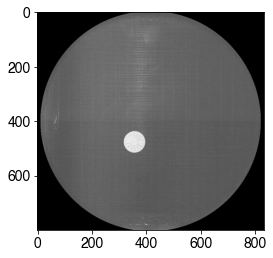

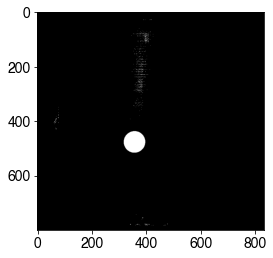

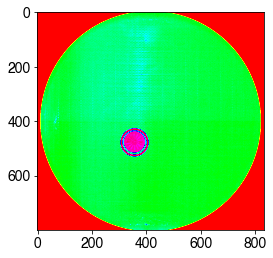

In [131]:
Rfact = 1.01 # factor of increase/decrease system radius
R =  0.5* np.min(np.shape(video[0])) # circular boundary radius, assuming image is adjusted to boundary

masked_image, image = circ_mask(cv.convertScaleAbs(video[0]), R, Rfact)

plt.figure()
plt.imshow(masked_image, cmap=cm.binary_r)

circles = None
dp = 1
tR = 45
dfact=2
cs = 2

# Iteratively search for disks, self-adjusting parameters to best fit
while cs>1:
    while circles is None and dp<tR:
        circles = locate_disk(masked_image, dp, dfact*tR, int(tR/2), tR)
        dp = dp + 0.1
    cs = np.shape(circles[0])[0]
    if cs>1: 
        dfact = dfact * 0.95
circles = circles[0,0]

print(circles)

inrange_image = cv.inRange(masked_image, 150, 255)

# Thresholding
plt.figure()
plt.imshow(inrange_image, cmap=cm.binary_r)

x0 = int(circles[0])
y0 = int(circles[1])
r = int(circles[2])

cir_image = np.copy(masked_image)
cv.circle(cir_image, (int(circles[0]),int(circles[1])), int(1.1*r), (255,255,0), 5);
plt.figure()
plt.imshow(cir_image,cmap=cm.hsv)



In [68]:
locate_disk(cv.inRange(imm, 150,255), 3.1, 100, 30, 45)

array([[[354.94998, 475.84998,  40.23   ]]], dtype=float32)

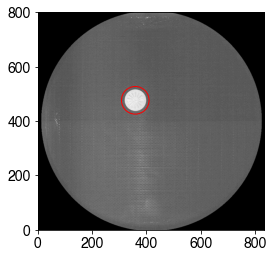

In [32]:

figure, axes = plt.subplots() 

cc = plt.Circle((circles[0], circles[1]), circles[2], edgecolor='r'
                ,facecolor='none' )
plt.xlim(0,832)
plt.ylim(0,800)
axes.add_artist(cc)
plt.imshow(masked_image, cmap=cm.binary_r)


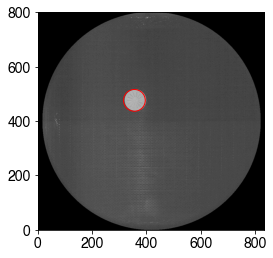

In [400]:
circles = cv.HoughCircles(image, cv.HOUGH_GRADIENT, 1.5, 50
                          ,minRadius=30,maxRadius=50)

figure, axes = plt.subplots() 
cc = plt.Circle((circles[0,0,0], circles[0,0,1]), circles[0,0,2], edgecolor='r'
                ,facecolor='none' )
plt.xlim(0,832)
plt.ylim(0,800)
axes.add_artist(cc)
plt.imshow(masked_image, cmap=cm.binary_r)


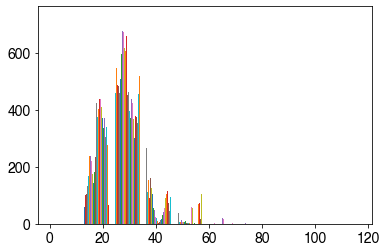

In [102]:
plt.hist(frame.T[0]);

In [142]:
ret, binary_ad = cv.threshold(image,40,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

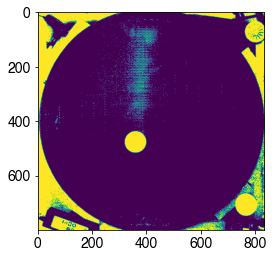

In [143]:
plt.figure()
plt.imshow(binary_ad)

TypeError: 'NoneType' object is not subscriptable

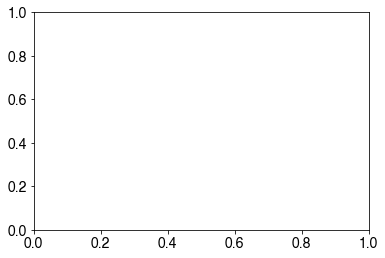

In [144]:
circles = cv.HoughCircles(binary_ad, cv.HOUGH_GRADIENT, 1,1
                          ,minRadius=10,maxRadius=90)

figure, axes = plt.subplots() 
cc = plt.Circle((circles[0,0,0], circles[0,0,1]), circles[0,0,2], edgecolor='r'
                ,facecolor='none' )
plt.xlim(0,800)
plt.ylim(0,832)
axes.set_aspect(1)
axes.add_artist(cc)
plt.imshow(image)

In [184]:
region = np.zeros((np.shape(image)[0], np.shape(image)[1]), dtype=np.uint8)
mask = cv.circle(region, (400,416), 410, 255, -1)

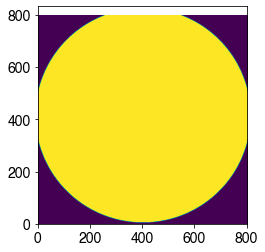

In [185]:
plt.figure()
plt.xlim(0,800)
plt.ylim(0,832)
plt.imshow(mask)



In [169]:
np.shape(image)

(800, 832)

In [159]:
cv.HoughCircles(image, cv.HOUGH_GRADIENT, 2, 300
                          ,minRadius=1, maxRadius=500)

array([[[763. , 709. ,  38. ],
        [355. , 475. ,  41.2]]], dtype=float32)

In [159]:
cv.HoughCircles(image, cv.HOUGH_GRADIENT, 2, 300
                          ,minRadius=1, maxRadius=500)

array([[[763. , 709. ,  38. ],
        [355. , 475. ,  41.2]]], dtype=float32)

In [68]:
np.shape(image)

(800, 832)

In [75]:
circles[0,0,1]

476.25

In [43]:
circles = cv.HoughCircles(image, cv.HOUGH_GRADIENT, 1.5,1
                          ,minRadius=1,maxRadius=90)

In [56]:
circles[0,0,0]

356.25

In [57]:
for i in icircles[0,:]:
    # draw the outer circle
    cv.circle(frame.T[0],(i[0],i[1]),i[2],(0,255,0),2)

error: OpenCV(4.5.3) :-1: error: (-5:Bad argument) in function 'circle'
> Overload resolution failed:
>  - Layout of the output array img is incompatible with cv::Mat (step[ndims-1] != elemsize or step[1] != elemsize*nchannels)
>  - Expected Ptr<cv::UMat> for argument 'img'


In [ ]:
cv2.waitKey(0) 

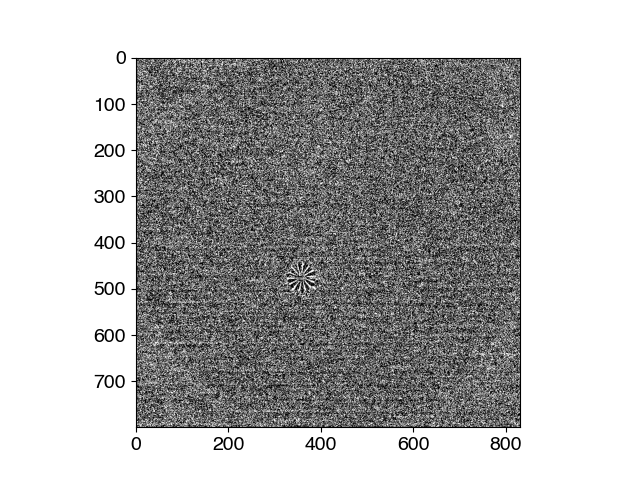

In [14]:
plt.figure(1)
plt.imshow(video[1]-video[0])

In [5]:
datos = pd.read_pickle('tracks/3988fa72e13c390c35b4a55c0495bc63.pkl.xz')
datos = datos[['x','y','frame']]

X = datos.x.values
Y = datos.y.values
it = datos.frame.values
xf = signal.savgol_filter(X, 9, 5)
yf = signal.savgol_filter(Y, 9, 5)
vxf = xf[1:] - xf[:-1]
vyf = yf[1:] - yf[:-1]
xf = xf[:-1]
yf = yf[:-1]

nframes = len(datos)-1

datos.head()


,x,y,frame
0,363.396279,533.013782,1
1,363.571671,533.130123,2
2,363.886110,533.025815,3
3,363.869190,533.091061,4
4,363.420557,533.088331,5


In [6]:
def update(dt):
    plt.close('all')
    fig = plt.figure(figsize=(7.5,6))
    cmm = colors.ListedColormap.reversed(cm.viridis)
    ecolors = (cm.viridis_r((it[::dt]/ it[::dt].max()) ))
    dr = np.max([xf.max()-xf.min(), yf.max()-yf.min()]) *1.1
    plt.xlim(xf.min()*0.9,xf.min()+dr)
    plt.ylim(yf.min()*0.9,yf.min()+dr)
    plt.scatter(xf[::dt], yf[::dt], s=80, facecolors='none', edgecolors=ecolors, linewidths=0.75, alpha=0.75)
    normc = norm = colors.Normalize(vmin=0, vmax=100)
    cbar=plt.colorbar(cm.ScalarMappable(cmap=cm.viridis_r, norm = normc),
                      label= 'time (% of movie length)',orientation="vertical",shrink=0.99)
    #fig.canvas.draw() # with inline
    #fig.show() # with ipympl
    #return fig

In [7]:
plt.close('all')
fig = widgets.interact(update,dt=widgets.BoundedIntText(min=1, max=500, step=1, value=50));

interactive(children=(BoundedIntText(value=50, description='dt', max=500, min=1), Output()), _dom_classes=('wi…

In [9]:
datos.to_csv('tabla.csv')

In [44]:
histx, edgesx = np.histogram(vxf, bins=100, density=True)
histy, edgesy = np.histogram(vyf, bins=100, density=True)
hist, edges = np.histogram(np.sqrt(vxf**2+vyf**2), bins =200, range= (0,1.2),density=True)

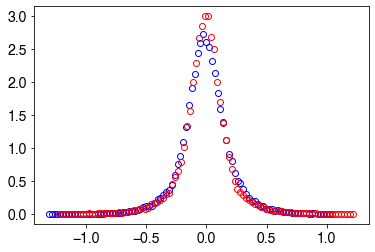

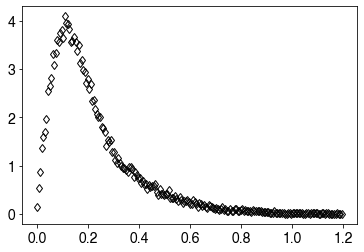

In [47]:
plt.close('all')
plt.figure(2)
plt.plot( edgesx[:-1], histx,'o',mfc='none', mec='b');
plt.plot(edgesy[:-1], histy, 'o', mfc='none',mec='r');
plt.figure(3)
plt.plot(edges[:-1], hist, 'd',c='k',mfc='none');